In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow # Import cv2_imshow


def load_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")

    return image

def detect_damage(original_image_path, damaged_image_path, threshold=0.7):
    try:
        original = load_image(original_image_path)
        damaged = load_image(damaged_image_path)
    except (FileNotFoundError, ValueError) as e:
        print(f"Error: {e}")
        return None

    # 이미지 크기가 다른 경우 리사이즈
    if original.shape != damaged.shape:
        damaged = cv2.resize(damaged, (original.shape[1], original.shape[0]))

    # ORB 객체 생성
    orb = cv2.ORB_create()

    # 각 이미지에서 특징점 검출 및 기술자 생성
    kp1, des1 = orb.detectAndCompute(original, None)
    kp2, des2 = orb.detectAndCompute(damaged, None)

    # 특징점 매칭
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # 거리 기반으로 매칭 정렬
    matches = sorted(matches, key=lambda x: x.distance)

    # 매칭되지 않은 특징점 (잠재적 손상) 찾기
    matched_kp2 = set([match.trainIdx for match in matches if match.distance < threshold])
    unmatched_kp2 = set(range(len(kp2))) - matched_kp2

    # 결과 이미지 생성
    result = cv2.cvtColor(damaged, cv2.COLOR_GRAY2BGR)

    # 손상 영역 표시 (빨간색으로)
    for idx in unmatched_kp2:
        x, y = map(int, kp2[idx].pt)
        cv2.circle(result, (x, y), 5, (0, 0, 255), -1)

    return result
def quantify_damage(original_image_path, damaged_image_path, threshold=0.7):
    try:
        original = load_image(original_image_path)
        damaged = load_image(damaged_image_path)
    except (FileNotFoundError, ValueError) as e:
        print(f"Error: {e}")
        return None

    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(original, None)
    kp2, des2 = orb.detectAndCompute(damaged, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    matched_kp2 = set([match.trainIdx for match in matches if match.distance < threshold])
    unmatched_kp2 = set(range(len(kp2))) - matched_kp2

    damage_ratio = len(unmatched_kp2) / len(kp2) if kp2 else 0
    return damage_ratio

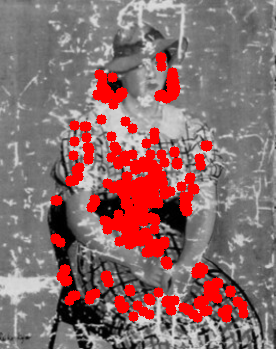

손상 정도: 100.00%


In [ ]:
original_path = '/content/drive/MyDrive/KeyPoint/images/origin.png'
damaged_path = '/content/drive/MyDrive/KeyPoint/images/impairment.png'

result = detect_damage(original_path, damaged_path)
if result is not None:
    cv2_imshow(result) # Use cv2_imshow instead of cv2.imshow

# 손상 정도 계산 예시
damage_ratio = quantify_damage(original_path, damaged_path)
if damage_ratio is not None:
    print(f"손상 정도: {damage_ratio:.2%}")

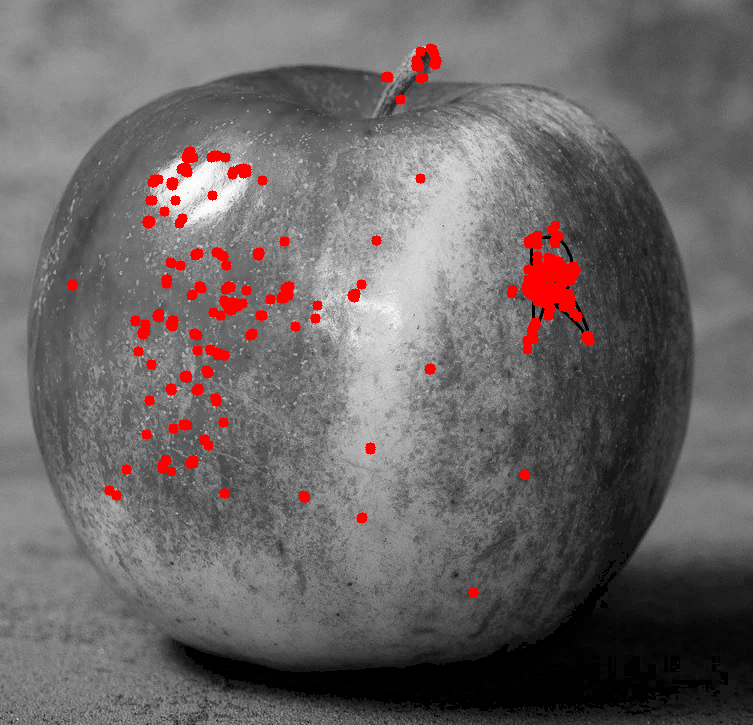

손상 정도: 100.00%


In [ ]:
original_path = '/content/drive/MyDrive/KeyPoint/images/apple.jpg'
damaged_path = '/content/drive/MyDrive/KeyPoint/images/apple2.png'

# 손상 감지 및 시각화
result = detect_damage(original_path, damaged_path)

if result is not None:
    # 결과 출력
    cv2_imshow(result)
else:
    print("손상 감지에 실패했습니다.")

# 손상 정도 계산
damage_ratio = quantify_damage(original_path, damaged_path)

if damage_ratio is not None:
    print(f"손상 정도: {damage_ratio:.2%}")
else:
    print("손상 정도 계산에 실패했습니다.")